# GROUP 36 PROJECT PROPOSAL
### Predicting Water Levels in Venice

**INTRODUCTION:**
For our project, we are going to observe a dataset that describes water levels in Venice, Italy. This dataset contains data from 1983 to 2015, and includes the water level in centimeters for every hour of every day. Our predictive question is:
### “What will the average water level in Venice be ten years from now?” 
We aim to observe possible trends in the average water level per year starting from 1983 and use regression to predict how much the water level will increase or decrease in the future. Since the dataset ends at the year 2015, we want to predict the water level ten years from that, in 2025. 


**PRELIMINARY DATA ANALYSIS**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We first loaded in our dataset and noticied the original dataset had some untidy data. This data was untidy because the original dataset had year, month, date, and and time all in one column, so we separated these into different columns with one value per cell. 
We used all the data from the original dataset, and did not need to remove any variables, as the dataset contains all the information we need already; the different water levels and the time at which they were recorded. 

In [2]:
data<-read_csv('venezia.csv') |>separate(col=datetime, into=c('Year', 'Month', 'Date'), sep='-', convert=TRUE) |>
                                separate(col=Date, into=c('Day', 'Time'), sep=" ", convert=TRUE)

head(data)
tail(data)

Rows: 289272 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): level
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Month,Day,Time,level
<int>,<int>,<int>,<chr>,<dbl>
1983,1,1,01:00:00,44
1983,1,1,02:00:00,35
1983,1,1,03:00:00,23
1983,1,1,04:00:00,10
1983,1,1,05:00:00,1
1983,1,1,06:00:00,-1


Year,Month,Day,Time,level
<int>,<int>,<int>,<chr>,<dbl>
2015,12,31,19:00:00,-19
2015,12,31,20:00:00,-18
2015,12,31,21:00:00,-14
2015,12,31,22:00:00,-5
2015,12,31,23:00:00,8
2016,1,1,00:00:00,20


Initially we wanted to look at just the first day of every month at a specific time, for example; 12 pm of every first day. However, we realized that this does not account for high and low tide periods of each day. Therefore, we changed our method to take the mean water level of the entire day, as this takes into consideration different tides throughout the day. From there we grouped by year and found the mean water level of each year.

In [3]:
filtered_data <- data |>  
filter( Day == "1")

mean_monthly_data <- filtered_data |> 
group_by(Year, Month, Day) |>
summarize(mean_daily = mean(level))

yearly_mean <- mean_monthly_data |>
group_by(Year) |>
summarize(mean_year = mean(mean_daily)) |>
slice(-34)

head(yearly_mean)
tail(yearly_mean)

`summarise()` has grouped output by 'Year', 'Month'. You can override using the
`.groups` argument.


Year,mean_year
<int>,<dbl>
1983,21.30495
1984,22.61458
1985,18.47917
1986,23.38542
1987,20.69444
1988,21.61806


Year,mean_year
<int>,<dbl>
2010,44.46181
2011,29.59028
2012,36.75347
2013,33.06597
2014,41.01042
2015,34.23958


We then visualized our data with a line plot. We initially tried to use a bar plot; but we noticed an outlier within our data, the year 2016 only had 1 data point in total which meant the average for that year messed up the plot.. Therefore we removed the year 2016 from the yearly averages as it had insufficient data.

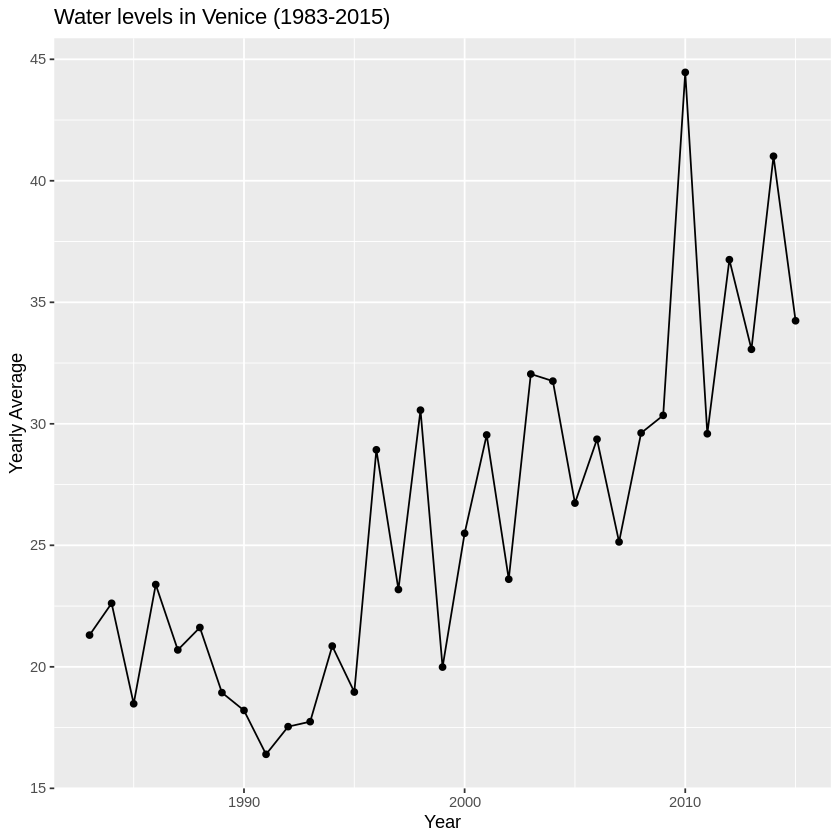

In [5]:
graph_data <- yearly_mean |>
ggplot(aes( x = Year, y = mean_year))+
geom_point()+
geom_line() +
labs( x = "Year", y = "Yearly Average", title = "Water levels in Venice (1983-2015)")

graph_data

**Methodology:** In order to predict future trends within Venice's Water Levels we believe using a regression model would allow us to optain the most accurate result orientated towards this. Through the following we will implement regression line onto our line plot. This line of regression will be in a distict color in order to not cause confusion among the line of the lineplot. 

**EXPECTED OUTCOMES/SIGNIFICANCE:** We expect to find increasing water levels as the years progress, which corresponds to water levels rising all around the world due to global warming. The results we predict will likely reflect the impact global warming has on the environment. This can lead to more exploratory questions asking what factors are causing the water levels to change. 